# Installation requirements

In [17]:
#! pip install pandas
#! pip install numpy
#! pip install scikit-learn
#! pip install matplotlib
#! pip install seaborn
#! pip install graphviz

# importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
from pprint import pprint

# Reading data and reformatting for working

In [3]:
# Reading the data and making a copy in order to not hurt the data.
df = pd.read_csv("students_adaptability_level_online_education.csv", usecols=['Gender', 'Age', 'Education Level', 'Financial Condition', 'Device', 'Adaptivity Level'])
df_adapt_textual = df.copy()

# in order to work with the data more easily, we will convert the Y (Adaptivity Level column) to a number.
df["Adaptivity Level"] = df["Adaptivity Level"].replace({"Low": (100 / 3), "Moderate": (100 / 3) * 2, "High": 100})
df.head()

,Gender,Age,Education Level,Financial Condition,Device,Adaptivity Level
0,Boy,21-25,University,Mid,Tab,66.666667
1,Girl,21-25,University,Mid,Mobile,66.666667
2,Girl,16-20,College,Mid,Mobile,66.666667
3,Girl,11-15,School,Mid,Mobile,66.666667
4,Girl,16-20,School,Poor,Mobile,33.333333


# Calculating means of the parameters for basic statistics

<Axes: xlabel='Gender', ylabel='Adaptivity Level'>

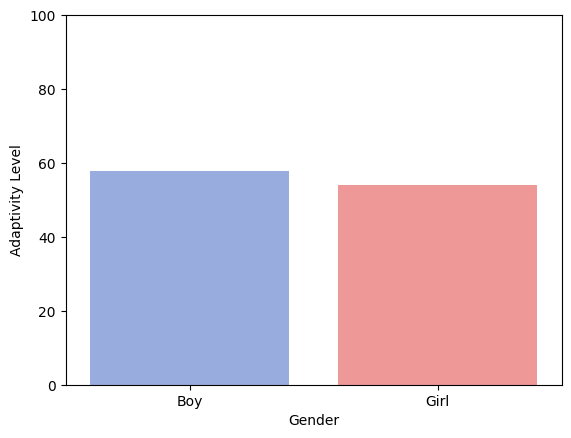

In [4]:
# Getting the rows where the gender is "Boy" and "Girl" seperately.
boy_and_adapt = df[df["Gender"] == "Boy"]
girl_and_adapt = df[df["Gender"] == "Girl"]

# Joining the seperate DataFrames into one DataFrame with the mean of the Adaptivity Level for Boys and Girls.
gender_and_adapt_df = pd.DataFrame.from_dict({"Gender": ["Boy", "Girl"],
                                              "Adaptivity Level": [boy_and_adapt["Adaptivity Level"].mean(),
                                                                   girl_and_adapt["Adaptivity Level"].mean()
                                                                  ]
                                             })

# Styling the plot and show
colors = ["#8EA7E9", "#FD8A8A"]
gender_and_adapt = sns.barplot(data=gender_and_adapt_df, x="Gender", y="Adaptivity Level",palette=colors)
gender_and_adapt.set_ylim(0, 100)
gender_and_adapt

<Axes: xlabel='Device', ylabel='Adaptivity Level'>

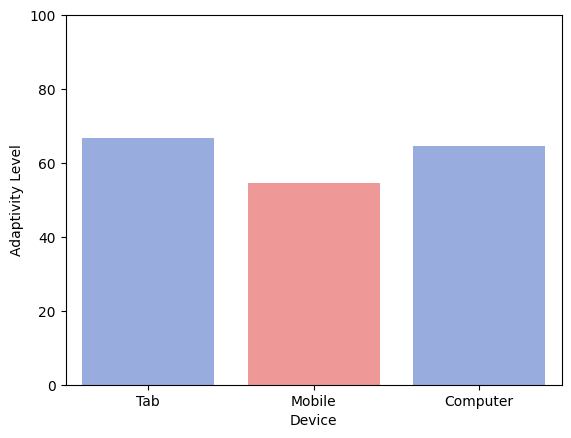

In [5]:
# Getting the rows where the device is "tab", "mobile" and "computer" seperately.
tab_and_adapt = df[df["Device"] == "Tab"]
mobile_and_adapt = df[df["Device"] == "Mobile"]
computer_and_adapt = df[df["Device"] == "Computer"]

# Joining the seperate DataFrames into one DataFrame with the mean of the Adaptivity Level for each type of device.
device_and_adapt_df = pd.DataFrame.from_dict({"Device": ["Tab", "Mobile", "Computer"],
                                              "Adaptivity Level": [tab_and_adapt["Adaptivity Level"].mean(), mobile_and_adapt["Adaptivity Level"].mean(), computer_and_adapt["Adaptivity Level"].mean()]})

# Styling the plot and show
colors = ["#8EA7E9", "#FD8A8A", "#8EA7E9"]
device_and_adapt = sns.barplot(data=device_and_adapt_df, x="Device", y="Adaptivity Level",palette=colors)
device_and_adapt.set_ylim(0, 100)
device_and_adapt

<Axes: xlabel='Age', ylabel='Adaptivity Level'>

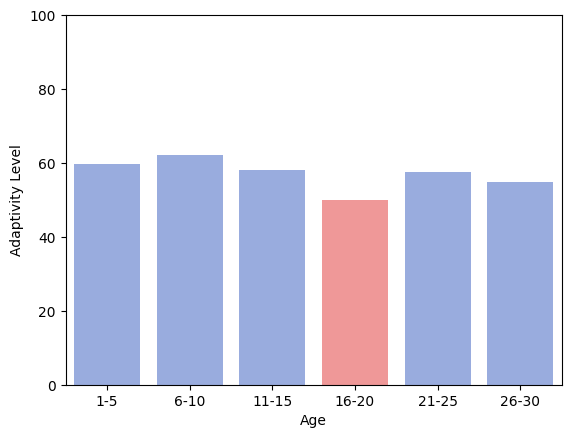

In [6]:
# Getting the rows where the age is "1-5", "6-10", "11-15", "16-20", "21-25" and "26-30" seperately.
Age1 = df[df["Age"] == "1-5"]
Age2 = df[df["Age"] == "6-10"]
Age3 = df[df["Age"] == "11-15"]
Age4 = df[df["Age"] == "16-20"]
Age5 = df[df["Age"] == "21-25"]
Age6 = df[df["Age"] == "26-30"]

# Joining the seperate DataFrames into one DataFrame with the mean of the Adaptivity Level for each age.
Age_and_adapt_df = pd.DataFrame.from_dict({"Age": ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30"],
                                              "Adaptivity Level": [Age1["Adaptivity Level"].mean(),
                                                                   Age2["Adaptivity Level"].mean(),
                                                                   Age3["Adaptivity Level"].mean(),
                                                                   Age4["Adaptivity Level"].mean(),
                                                                   Age5["Adaptivity Level"].mean(),
                                                                   Age6["Adaptivity Level"].mean()
                                                                  ]
                                          })

# Styling the plot and show
colors = ["#8EA7E9", "#8EA7E9", "#8EA7E9", "#FD8A8A", "#8EA7E9", "#8EA7E9"] 

Age_and_adapt = sns.barplot(data=Age_and_adapt_df, x="Age", y="Adaptivity Level",palette=colors)
Age_and_adapt.set_ylim(0, 100)
Age_and_adapt

<Axes: xlabel='Education Level', ylabel='Adaptivity Level'>

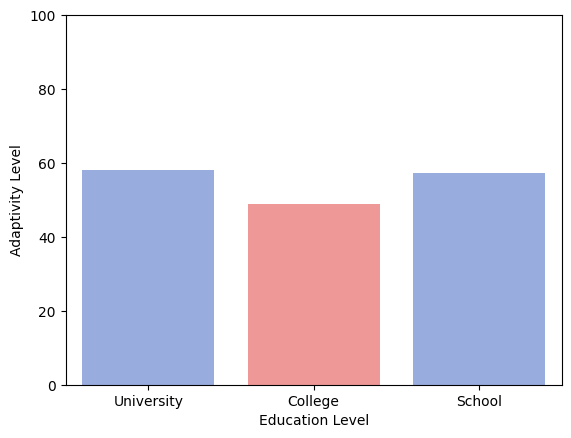

In [7]:
# Getting the rows where the Education Level is "School", "College" and "University" seperately.
School_and_adapt = df[df["Education Level"] == "School"]
College_and_adapt = df[df["Education Level"] == "College"]
University_and_adapt = df[df["Education Level"] == "University"]

# Joining the seperate DataFrames into one DataFrame with the mean of the Adaptivity Level for each Education Level.
Education_Level_and_adapt_df = pd.DataFrame.from_dict({"Education Level": ["University", "College", "School"],
                                                       "Adaptivity Level": [School_and_adapt["Adaptivity Level"].mean(),
                                                                            College_and_adapt["Adaptivity Level"].mean(),
                                                                            University_and_adapt["Adaptivity Level"].mean()
                                                                           ]
                                                      })

# Styling the plot and show
colors = ["#8EA7E9", "#FD8A8A", "#8EA7E9"]

Education_Level_and_adapt = sns.barplot(data=Education_Level_and_adapt_df, x="Education Level", y="Adaptivity Level",palette=colors)
Education_Level_and_adapt.set_ylim(0, 100)
Education_Level_and_adapt

<Axes: xlabel='Financial Condition', ylabel='Adaptivity Level'>

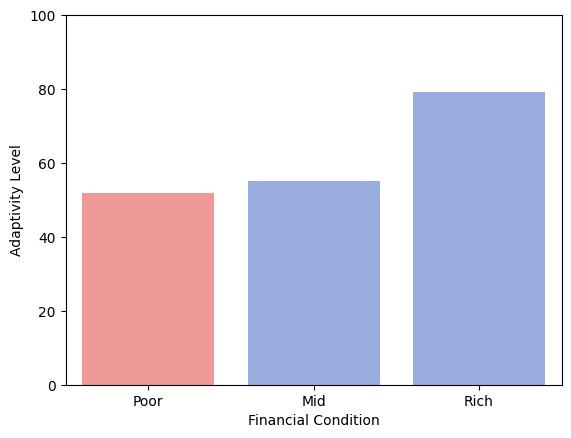

In [8]:
# Getting the rows where the Financial Condition is "Poor", "Mid" and "Rich" seperately.
Poor_and_adapt = df[df["Financial Condition"] == "Poor"]
Mid_and_adapt = df[df["Financial Condition"] == "Mid"]
Rich_and_adapt = df[df["Financial Condition"] == "Rich"]

# Joining the seperate DataFrames into one DataFrame with the mean of the Adaptivity Level for each Financial Condition.
financial_condition_and_adapt_df = pd.DataFrame.from_dict({"Financial Condition": ["Poor", "Mid", "Rich"],
                                                           "Adaptivity Level": [Poor_and_adapt["Adaptivity Level"].mean(),
                                                                                Mid_and_adapt["Adaptivity Level"].mean(),
                                                                                Rich_and_adapt["Adaptivity Level"].mean()
                                                                               ]
                                                          })

# Styling the plot and show
colors = ["#FD8A8A", "#8EA7E9", "#8EA7E9"]
financial_condition_and_adapt = sns.barplot(data=financial_condition_and_adapt_df, x="Financial Condition", y="Adaptivity Level",palette=colors)
financial_condition_and_adapt.set_ylim(0, 100)
financial_condition_and_adapt

# reformatting the parameters and creating a random forest model

In [9]:
# Formatting parameters
df_adapt_textual['Gender'] = df_adapt_textual['Gender'].replace({"Boy": 0, "Girl": 1})
df_adapt_textual['Age'] = df_adapt_textual['Age'].replace({"1-5": 0, "6-10": 1, "11-15": 2, "16-20": 3, "21-25": 4, "26-30": 5})
df_adapt_textual['Device'] = df_adapt_textual['Device'].replace({"Tab": 0, "Mobile": 1, "Computer": 2})
df_adapt_textual['Education Level'] = df_adapt_textual['Education Level'].replace({"School": 0, "College": 1, "University": 2})
df_adapt_textual['Financial Condition'] = df_adapt_textual['Financial Condition'].replace({"Poor": 0, "Mid": 1, "Rich": 2})

# Definding the paremeters and the Y (Adaptivity Level)
X = df_adapt_textual.drop('Adaptivity Level', axis=1)
y = df_adapt_textual['Adaptivity Level']

# Splitting the data to train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=430)
# Creating the random forest model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
# Calculating the accuracy
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy is {:.2f}%".format(accuracy * 100))

The accuracy is 73.18%


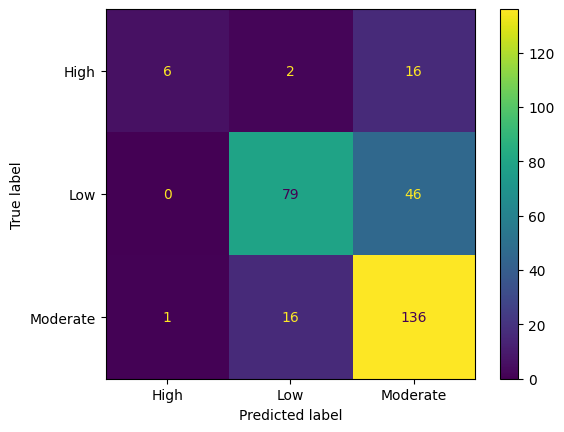

In [10]:
# creating the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [11]:
# creating a decision tree and saving it in a PDF
dot_data = export_graphviz(clf.estimators_[1], out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Adaptivity_1")

'Adaptivity_1.pdf'

# Predicting the best parameters for high and low adaptivity level

In [ ]:
# creating a map for the categories
mapping = {
    "gender": {
        0: "Boy",
        1: "Girl"
    },
    "age": {
        0: "1-5",
        1: "6-10",
        2: "11-15",
        3: "16-20",
        4: "21-25",
        5: "26-30"
    },
    "device": {
        0: "Tab",
        1: "Mobile",
        2: "Computer"
    },
    "Education Level": {
        0: "School",
        1: "College",
        2: "University"
    },
    "Financial Condition": {
        0: "Poor",
        1: "Mid",
        2: "Rich"
    }
}

low_adapt = []
high_adapt = []

# Loops that find what are the best matches for the paramters that will be a high or a low adaptivity level
for gender in range(0, 2):
    for age in range(0, 6):
        for device in range(0, 3):
            for edu in range(0, 3):
                for financial in range(0, 3):
                    prediction = clf.predict(np.array([gender, age, device, edu, financial]).reshape(1, -1))
                    if prediction == 'Low':
                        low_adapt.append([mapping['gender'][gender], mapping['age'][age], mapping['device'][device], mapping['Education Level'][edu], mapping['Financial Condition'][financial]])
                    elif prediction == 'High':
                        high_adapt.append([mapping['gender'][gender], mapping['age'][age], mapping['device'][device], mapping['Education Level'][edu], mapping['Financial Condition'][financial]])

In [18]:
low_adapt

[['Boy', '1-5', 'Tab', 'School', 'Poor'],
 ['Boy', '1-5', 'Tab', 'School', 'Mid'],
 ['Boy', '1-5', 'Tab', 'School', 'Rich'],
 ['Boy', '1-5', 'Tab', 'College', 'Poor'],
 ['Boy', '1-5', 'Tab', 'College', 'Mid'],
 ['Boy', '1-5', 'Tab', 'College', 'Rich'],
 ['Boy', '1-5', 'Tab', 'University', 'Poor'],
 ['Boy', '1-5', 'Tab', 'University', 'Mid'],
 ['Boy', '1-5', 'Tab', 'University', 'Rich'],
 ['Boy', '1-5', 'Mobile', 'School', 'Poor'],
 ['Boy', '1-5', 'Mobile', 'School', 'Mid'],
 ['Boy', '1-5', 'Mobile', 'School', 'Rich'],
 ['Boy', '1-5', 'Mobile', 'College', 'Mid'],
 ['Boy', '1-5', 'Mobile', 'College', 'Rich'],
 ['Boy', '1-5', 'Mobile', 'University', 'Poor'],
 ['Boy', '1-5', 'Mobile', 'University', 'Mid'],
 ['Boy', '1-5', 'Mobile', 'University', 'Rich'],
 ['Boy', '1-5', 'Computer', 'School', 'Poor'],
 ['Boy', '1-5', 'Computer', 'School', 'Mid'],
 ['Boy', '1-5', 'Computer', 'School', 'Rich'],
 ['Boy', '1-5', 'Computer', 'College', 'Mid'],
 ['Boy', '1-5', 'Computer', 'College', 'Rich'],
 ['B

In [13]:
# function that returns a key where a value appears
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if value == val:
            return key
    return

In [14]:
# preparing dictionary for counting the parameters
counting_high = {
    "gender": {
        "Boy": 0,
        "Girl": 0
    },
    "age": {
        "1-5": 0,
        "6-10": 0,
        "11-15": 0,
        "16-20": 0,
        "21-25": 0,
        "26-30": 0
    },
    "device": {
        "Tab": 0,
        "Mobile": 0,
        "Computer": 0
    },
    "Education Level": {
        "School": 0,
        "College": 0,
        "University": 0
    },
    "Financial Condition": {
        "Poor": 0,
        "Mid": 0,
        "Rich": 0
    }
}

# counting parameters
for case in high_adapt:
    counting_high["gender"][case[0]] += 1
    counting_high["age"][case[1]] += 1
    counting_high["device"][case[2]] += 1
    counting_high["Education Level"][case[3]] += 1
    counting_high["Financial Condition"][case[4]] += 1

# preparing dictionary for finding the categories that appears the maximum times
results_high = {
    "gender": {
        "max": 0,
        "cat": ""
    },
    "age": {
        "max": 0,
        "cat": ""
    },
    "device": {
        "max": 0,
        "cat": ""
    },
    "Education Level": {
        "max": 0,
        "cat": ""
    },
    "Financial Condition": {
        "max": 0,
        "cat": ""
    }
} 

# calculating what is the maximum category
for cat, values in counting_high.items():
    results_high[cat]["max"] = max(counting_high[cat].values())
    results_high[cat]["cat"] = get_key(counting_high[cat], results_high[cat]["max"])

# printing the results      
print(f"""The best match for high adaptivity is:
      Gender: {results_high['gender']['cat']}
      Age: {results_high['age']['cat']}
      Device: {results_high['device']['cat']}
      Education Level: {results_high['Education Level']['cat']}
      Financial Condition: {results_high['Financial Condition']['cat']}""")

The best match for high adaptivity is:
      Gender: Boy
      Age: 26-30
      Device: Computer
      Education Level: University
      Financial Condition: Rich


In [15]:
# preparing dictionary for counting the parameters
counting_low = {
    "gender": {
        "Boy": 0,
        "Girl": 0
    },
    "age": {
        "1-5": 0,
        "6-10": 0,
        "11-15": 0,
        "16-20": 0,
        "21-25": 0,
        "26-30": 0
    },
    "device": {
        "Tab": 0,
        "Mobile": 0,
        "Computer": 0
    },
    "Education Level": {
        "School": 0,
        "College": 0,
        "University": 0
    },
    "Financial Condition": {
        "Poor": 0,
        "Mid": 0,
        "Rich": 0
    }
}

# counting parameters
for case in low_adapt:
    counting_low["gender"][case[0]] += 1
    counting_low["age"][case[1]] += 1
    counting_low["device"][case[2]] += 1
    counting_low["Education Level"][case[3]] += 1
    counting_low["Financial Condition"][case[4]] += 1

# preparing dictionary for finding the categories that appears the maximum times
results_low = {
    "gender": {
        "max": 0,
        "cat": ""
    },
    "age": {
        "max": 0,
        "cat": ""
    },
    "device": {
        "max": 0,
        "cat": ""
    },
    "Education Level": {
        "max": 0,
        "cat": ""
    },
    "Financial Condition": {
        "max": 0,
        "cat": ""
    }
} 

# calculating what is the maximum category
for cat, values in counting_low.items():
    results_low[cat]["max"] = max(counting_low[cat].values())
    results_low[cat]["cat"] = get_key(counting_low[cat], results_low[cat]["max"])

# printing the results  
print(f"""The best match for low adaptivity is:
      Gender: {results_low['gender']['cat']}
      Age: {results_low['age']['cat']}
      Device: {results_low['device']['cat']}
      Education Level: {results_low['Education Level']['cat']}
      Financial Condition: {results_low['Financial Condition']['cat']}""")

The best match for low adaptivity is:
      Gender: Boy
      Age: 1-5
      Device: Tab
      Education Level: School
      Financial Condition: Mid


# Calculating the importance scores of the parameters

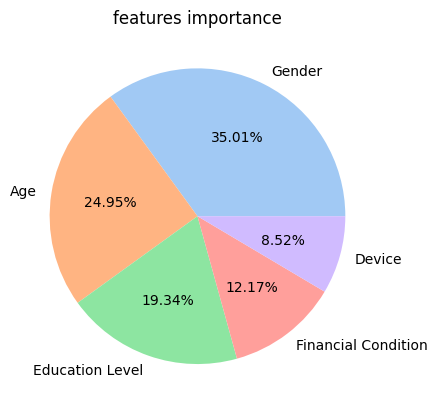

In [16]:
# calculating the importance score
importance_score = clf.feature_importances_
# sorting the scores
importance_score_sorted = sorted(importance_score, reverse=True)

# styling the plot
colors = sns.color_palette('pastel')[0:5]

# creating and showing the plot
plt.pie(importance_score_sorted, labels=X.columns, colors=colors, autopct="%.2f%%")
plt.title("features importance")
plt.show()